# Encontrar número de clusters óptimo

En este notebook se os indicarán los pasos a seguir para encontrar el número de clusters óptimo según el método de la silueta. Primero os pongo un ejemplo sencillo y luego encontraréis un ejercicio que tenéis que resolver durante la sesión de laboratorio (o en casa). Este ejercicio no lo voy a evaluar, la idea es que lo resolváis vosotros mismos, podáis comparar resultados con compañeros. Si tenéis alguna duda, por supuesto, me preguntáis.

## 0. Importaciones varias necesarias

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits, load_iris
from sklearn.metrics import silhouette_score, calinski_harabaz_score

ImportError: cannot import name 'calinski_harabaz_score' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

## 1. Silueta como mecanismo para evaluar un resultado de clustering

En este trozo de código se ejecuta KMeans sobre los datos de iris con dos "k" diferentes, a elegir por el usuario, y se calcula el valor de la silueta (método de evaluación de clusters) para cada k escogida. Para obtener información sobre lo que es la silueta, podéis leer la página de wikipedia https://en.wikipedia.org/wiki/Silhouette_(clustering) o directamente el artículo que la introdujo: https://doi.org/10.1016/0377-0427(87)90125-7

In [7]:
# load iris data
iris = load_iris()


best_score = 0
best_numClusters = 0
for numClusters in range(2,20):
    kmeans = KMeans(n_clusters = numClusters)
    kmeans.fit(iris.data)
    score = silhouette_score(iris.data, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_numClusters = numClusters

print("{} clusters are a better option for this dataset".format(best_numClusters))
print("With a score of: {}".format(best_score))

"""
# select 2 values for numbers of clusters to compare
nc1, nc2 = 3, 4
kmeans1 = KMeans(n_clusters = nc1)
kmeans1.fit(iris.data)
score1 = silhouette_score(iris.data, kmeans1.labels_)
kmeans2 = KMeans(n_clusters = nc2)
kmeans2.fit(iris.data)
score2 = silhouette_score(iris.data, kmeans2.labels_)
print("silhouette score for {} clusters: {:.4f}; silhouette score for {} clusters: {:.4f}".format(nc1, score1, nc2, score2))
if score1 > score2:
    print("{} clusters are a better option for this dataset".format(nc1))
else:
    print("{} clusters are a better option for this dataset".format(nc2))
    """


2 clusters are a better option for this dataset
With a score of: 0.6810461692117462


'\n# select 2 values for numbers of clusters to compare\nnc1, nc2 = 3, 4\nkmeans1 = KMeans(n_clusters = nc1)\nkmeans1.fit(iris.data)\nscore1 = silhouette_score(iris.data, kmeans1.labels_)\nkmeans2 = KMeans(n_clusters = nc2)\nkmeans2.fit(iris.data)\nscore2 = silhouette_score(iris.data, kmeans2.labels_)\nprint("silhouette score for {} clusters: {:.4f}; silhouette score for {} clusters: {:.4f}".format(nc1, score1, nc2, score2))\nif score1 > score2:\n    print("{} clusters are a better option for this dataset".format(nc1))\nelse:\n    print("{} clusters are a better option for this dataset".format(nc2))\n    '

## 2. Lo que tienes que hacer

Utiliza el algoritmo de clustering que prefieras para hacer un clustering sobre los datos "digits" que puedes obtener con la función `load_digits` de `scikit-learn`. Estos datos son una colección de 1797 imágenes de 8x8 = 64 píxeles que representan dí­gitos del 0 al 9. Son datos etiquetados con el número de la imagen. Cada observación (ejemplo) consta por lo tanto de 64 atributos. Lo que tienes que hacer es:
1. Escoge un algoritmo de clustering que te guste
2. Optimiza el número de clusters sobre este dataset; para ello utiliza una medida como la silueta u otras (una alternativa popular es el í­ndice Calinski-Harabaz, por ejemplo)
3. Calcula de alguna forma que se te ocurra (cuantitativa) la capacidad de tu clustering para separar en clusters los diferentes dígitos (del 0 al 9) que representan las imágenes.
4. Haz un plot de los dígitos con el clustering óptimo que hayas encontrado. Para hacer la visualización, utiliza PCA o t-SNE para reducir de 64 a 2 dimensiones.

<Figure size 432x288 with 0 Axes>

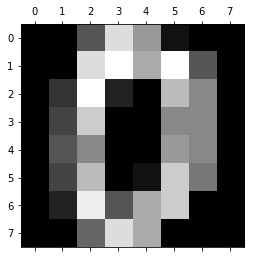

In [ ]:
%matplotlib inline
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
X = digits.data
y = digits.target

In [ ]:
X.shape

(1797, 64)

In [ ]:
y.shape

(1797,)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()
data = digits.data

res = train_test_split(digits.data, digits.target,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [38]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation='logistic',
                    alpha=1e-4,
                    solver='sgd',
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3,
                    verbose=True)

mlp.fit(train_data, train_labels)

In [40]:
predictions = mlp.predict(test_data)
predictions[:25] , test_labels[:25]
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

(array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 1, 8, 4, 1, 7, 3, 7, 1, 1, 1,
        8, 6, 0]),
 array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
        8, 6, 0]))

In [42]:
for i in range(5, 35):
    mlp = MLPClassifier(hidden_layer_sizes=(i,),
                        activation='logistic',
                        random_state=1,
                        alpha=1e-4,
                        max_iter=10000,
                        solver='sgd',
                        tol=1e-4,
                        learning_rate_init=.3,
                        verbose=False)
    mlp.fit(train_data, train_labels)
    predictions = mlp.predict(test_data)
    acc_score = accuracy_score(test_labels, predictions)
    print(i, acc_score)

5 0.8194444444444444
6 0.8777777777777778
7 0.8777777777777778
8 0.8444444444444444
9 0.8722222222222222
10 0.9083333333333333
11 0.9194444444444444
12 0.9416666666666667
13 0.9611111111111111
14 0.9666666666666667
15 0.9305555555555556
16 0.9611111111111111
17 0.8111111111111111
18 0.9527777777777777
19 0.9361111111111111
20 0.9694444444444444
21 0.9638888888888889
22 0.9388888888888889
23 0.9555555555555556
24 0.9694444444444444
25 0.9611111111111111
26 0.975
27 0.9694444444444444
28 0.9555555555555556
29 0.9611111111111111
30 0.9694444444444444
31 0.9694444444444444
32 0.975
33 0.9694444444444444
34 0.9666666666666667
